In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.style.use('default')

In [2]:
def measure_metrics(X_train, X_test, y_train, y_test, regressor, scaler_y):
    y_pred = scaler_y.inverse_transform(regressor.predict(X_test).reshape(-1, 1))
    mse_test = root_mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)
    e_var_test = explained_variance_score(y_test, y_pred)
    
    # Training data
    y_pred_train = scaler_y.inverse_transform(regressor.predict(X_train).reshape(-1, 1))
    mse_train = root_mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    e_var_train = explained_variance_score(y_train, y_pred_train)
    
    print("Best model on test data:")
    print("Normalized Root Mean Squared Error:", mse_test /(np.max(y_test) - np.min(y_test)))   
    print("R-squared:", r2_test)
    print("Mean Absolute Error:", mae_test)
    print("Explained Variance Score:", e_var_test)
    
    print("= = = = =")
    
    print("Best model on training data:")
    print("Root Mean Squared Error:", mse_train / (np.max(y_train) - np.min(y_train)))
    print("R-squared:", r2_train)
    print("Mean Absolute Error:", mae_train)
    print("Explained Variance Score:", e_var_train)

In [3]:
def plot_pred_vs_real(X_train, X_test, y_train, y_test, regressor, scaler_y):
    y_pred_train = scaler_y.inverse_transform(regressor.predict(X_train).reshape(-1, 1))
    y_pred = scaler_y.inverse_transform(regressor.predict(X_test).reshape(-1, 1))

    # Wykresy do oceny modelu
    plt.figure(figsize=(12, 6))
    
    # Wykres rzeczywistych vs. przewidywanych wartości dla zbioru treningowego
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_pred_train, alpha=0.1, color='blue')
    plt.plot([5, 100], [5, 100], color='red', linestyle='--')
    plt.xlabel("Real values")
    plt.ylabel("Predicted values")
    plt.title("Real vs. Predicted (Training Set)")
    plt.grid(True)
    
    # Wykres rzeczywistych vs. przewidywanych wartości dla zbioru testowego
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.1, color='blue')
    plt.plot([5, 100], [5, 100], color='red', linestyle='--')
    plt.xlabel("Real values")
    plt.ylabel("Predicted values")
    plt.title("Real vs. Predicted (Test Set)")
    plt.grid(True)
    
    plt.show()

In [4]:
data = pd.read_csv('data/filtered_installations_with_weather.csv')
data['data'] = pd.to_datetime(data['data'])

# Now group by the month of the installation date and plot the 'efekt' for each installation id
data['month'] = data['data'].dt.to_period('M')
data['month'] = data['month'].dt.strftime('%m')
data['month'] = data['month'].str[-2:].astype(int)

data['hour'] = data['data'].dt.hour
data['hour'] = data['hour'].astype(int)

print(len(data))
data.head()

181306


,ID,power,index,longitude,latitude,data,dpv,p,efficiency,temperature,cloudiness,humidity,wind_speed,month,hour
0,11574,2200.0,6733.0,18.222229,54.486498,2020-01-01 08:00:00,104,2034,2.295000,1,10,93,23,1,8
1,11574,2200.0,6733.0,18.222229,54.486498,2020-01-01 09:00:00,192,3846,4.370000,1,10,96,24,1,9
2,11574,2200.0,6733.0,18.222229,54.486498,2020-01-01 10:00:00,174,3482,3.945000,2,91,94,29,1,10
3,11574,2200.0,6733.0,18.222229,54.486498,2020-01-01 11:00:00,216,4154,4.973684,2,91,94,29,1,11
4,11574,2200.0,6733.0,18.222229,54.486498,2020-01-01 12:00:00,148,2780,3.931250,3,91,92,32,1,12


# Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X = data[['longitude', 'latitude', 'temperature', 'humidity', 'wind_speed', 'cloudiness', "month", "hour"]]
y = data['efficiency']

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

       Feature         VIF
0    longitude   68.140647
1     latitude  119.797952
2  temperature    4.925015
3     humidity   29.807540
4   wind_speed    4.844073
5   cloudiness    4.128592
6        month    6.687887
7         hour   13.795851


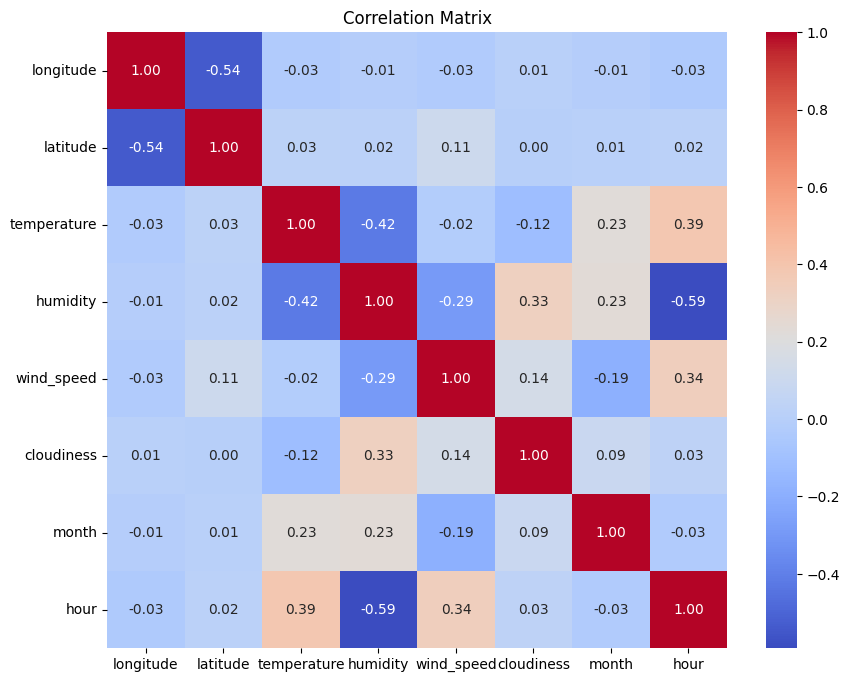

In [7]:
# Compute the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
    
unique_ids = data['ID'].unique()

train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)

train_df = data[data['ID'].isin(train_ids)]
test_df = data[data['ID'].isin(test_ids)]

X_train = train_df[[ 'temperature', 'humidity', 'wind_speed', 'cloudiness', "month", "hour"]]
X_test = test_df[['temperature', 'humidity', 'wind_speed', 'cloudiness', "month", "hour"]]

y_train = train_df['efficiency']
y_test = test_df['efficiency']

print(test_ids, train_ids)

print(len(X_train))
print(len(X_test))

[100612  11695 100730  12016  11592  11479 100654] [100418  11537  11574  10343  11996  11079  11686  11529 100352     35
    185 100462  10020 100254 100541 100282  12094 100668 100068  11149
  11528  11694 100549  12102  11137]
137165
44141


In [17]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.fit_transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(train_df['efficiency'].to_frame())
y_test_scaled = scaler_y.fit_transform(test_df['efficiency'].to_frame())

regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train_scaled)

measure_metrics(X_train_scaled, X_test_scaled, y_train, y_test, regressor, scaler_y)

Best model on test data:
Normalized Root Mean Squared Error: 0.18091489329604352
R-squared: 0.23903657445554427
Mean Absolute Error: 17.459284107355323
Explained Variance Score: 0.23903657445554405
= = = = =
Best model on training data:
Root Mean Squared Error: 0.2018939553384672
R-squared: 0.22901563633719257
Mean Absolute Error: 17.22350169856133
Explained Variance Score: 0.2291403080766342


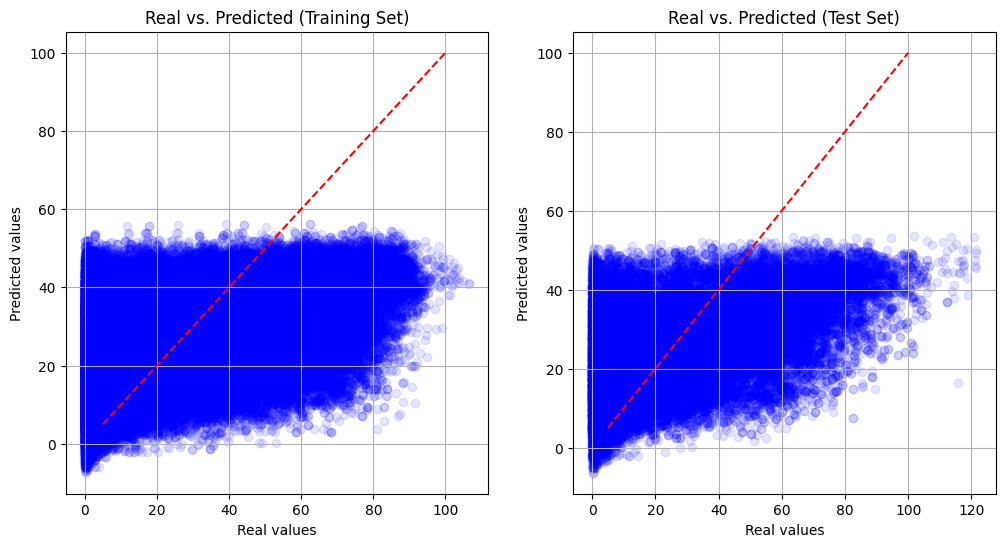

In [76]:
plot_pred_vs_real(X_train_scaled, X_test_scaled, y_train, y_test, regressor, scaler_y)

# Regression with polynomial features

In [179]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [180]:
df = data.copy()

In [181]:
mse = []

for i in range(2, 6):
    best_degree = 0
    pipeline = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
    pipeline.fit(X_train_scaled, y_train_scaled)
    
    y_pred = scaler_y.inverse_transform(pipeline.predict(X_test_scaled))
    mse_test = root_mean_squared_error(y_test, y_pred) /(np.max(y_test) - np.min(y_test))
    mse.append(mse_test) 
    measure_metrics(X_train_scaled, X_test_scaled, y_train, y_test, pipeline, scaler_y)

Best model on test data:
Normalized Root Mean Squared Error: 0.1281851199482114
R-squared: 0.6179762431938307
Mean Absolute Error: 12.21019844449013
Explained Variance Score: 0.6181282919748148
= = = = =
Best model on training data:
Root Mean Squared Error: 0.13799248608321987
R-squared: 0.6398281096088072
Mean Absolute Error: 11.662820157691778
Explained Variance Score: 0.639952781348258
Best model on test data:
Normalized Root Mean Squared Error: 0.12109285264543797
R-squared: 0.6590802484279945
Mean Absolute Error: 11.126140748992523
Explained Variance Score: 0.6590956432402375
= = = = =
Best model on training data:
Root Mean Squared Error: 0.12602710792299907
R-squared: 0.6995813586928045
Mean Absolute Error: 10.197392749794602
Explained Variance Score: 0.6997060304322574
Best model on test data:
Normalized Root Mean Squared Error: 0.12538656975022586
R-squared: 0.634474915958368
Mean Absolute Error: 11.640688334726484
Explained Variance Score: 0.6419007031906485
= = = = =
Best mod

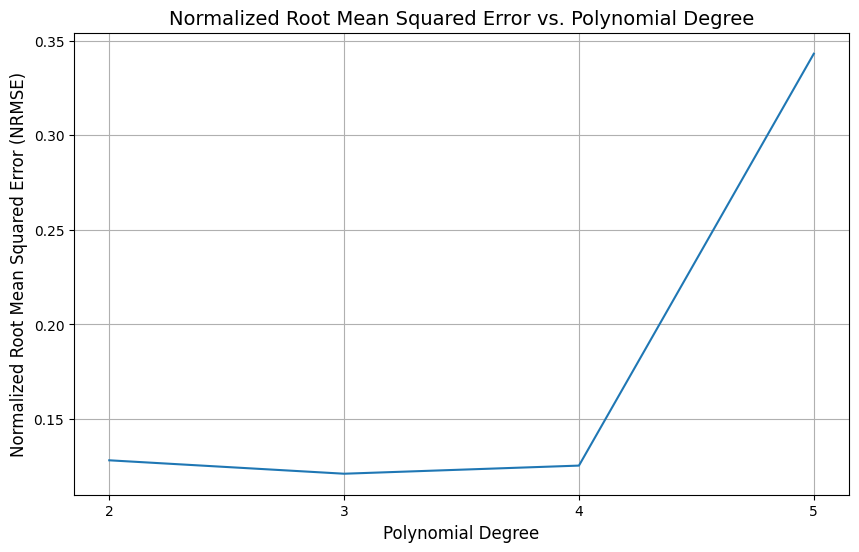

In [182]:
x_values = range(2, 2 + len(mse))

plt.figure(figsize=(10, 6))
plt.plot(x_values, mse)

# Add labels and title
plt.title("Normalized Root Mean Squared Error vs. Polynomial Degree", fontsize=14)
plt.xlabel("Polynomial Degree", fontsize=12)
plt.ylabel("Normalized Root Mean Squared Error (NRMSE)", fontsize=12)
plt.xticks(x_values)  # Ensure x-ticks correspond to the degrees
plt.grid(True)

plt.show()

In [183]:
pipeline = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
pipeline.fit(X_train_scaled, y_train_scaled)

measure_metrics(X_train_scaled, X_test_scaled, y_train, y_test, pipeline, scaler_y)

Best model on test data:
Normalized Root Mean Squared Error: 0.12109285264543797
R-squared: 0.6590802484279945
Mean Absolute Error: 11.126140748992523
Explained Variance Score: 0.6590956432402375
= = = = =
Best model on training data:
Root Mean Squared Error: 0.12602710792299907
R-squared: 0.6995813586928045
Mean Absolute Error: 10.197392749794602
Explained Variance Score: 0.6997060304322574


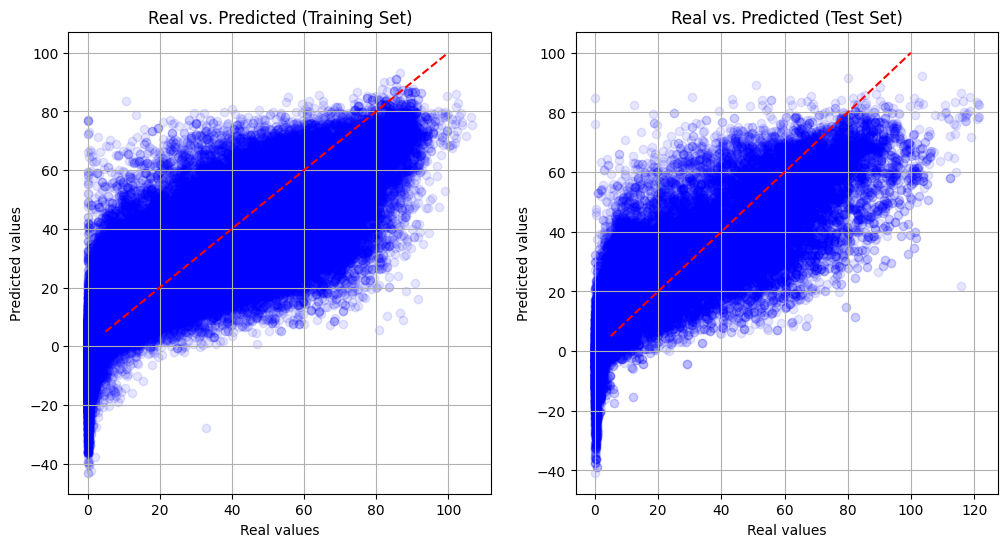

In [184]:
plot_pred_vs_real(X_train_scaled, X_test_scaled, y_train, y_test, pipeline, scaler_y)

In [185]:
# example_installation = data[data['id_licznika'] == 100668]
# example_installation = example_installation.sort_values('data')
# example_installation['data'] = pd.to_datetime(example_installation['data'])
# one_week = example_installation[example_installation['data'] >= '2020-07-01']
# one_week = one_week[one_week['data'] <= '2020-07-08']
# 
# one_week_predicted = one_week.copy()
# one_week_predicted['efekt'] = regressor.predict(one_week[['moc', 'dlugosc', 'szerokosc', 'temperatura', 'wilgotnosc', 'wiatr', 'zachmurzenie', 'month', "hour"]])
# one_week_predicted['data'] = pd.to_datetime(one_week_predicted['data'])
# 
# plt.figure(figsize=(10, 6))
# plt.plot(one_week['data'], one_week['efekt'])
# plt.plot(one_week_predicted['data'], one_week_predicted['efekt'])
# plt.title("Installation 100668 efficiency over one week with polynomial regression model predictions")
# plt.xlabel("Date")
# plt.ylabel("Efficiency (%)")
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=1))
# plt.gcf().autofmt_xdate()
# plt.legend(["Actual data", "Predicted data"])
# plt.grid(True)
# plt.show()

# K-Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.model_selection import cross_val_score

mse_values = {}
for i in range(1, 50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled, y_train_scaled)

    y_pred = knn.predict(X_test)
    scores = cross_val_score(knn, X_train_scaled, y_train_scaled, scoring='mean_squared_error', cv=5)
    mse_values[i] = np.mean(scores)


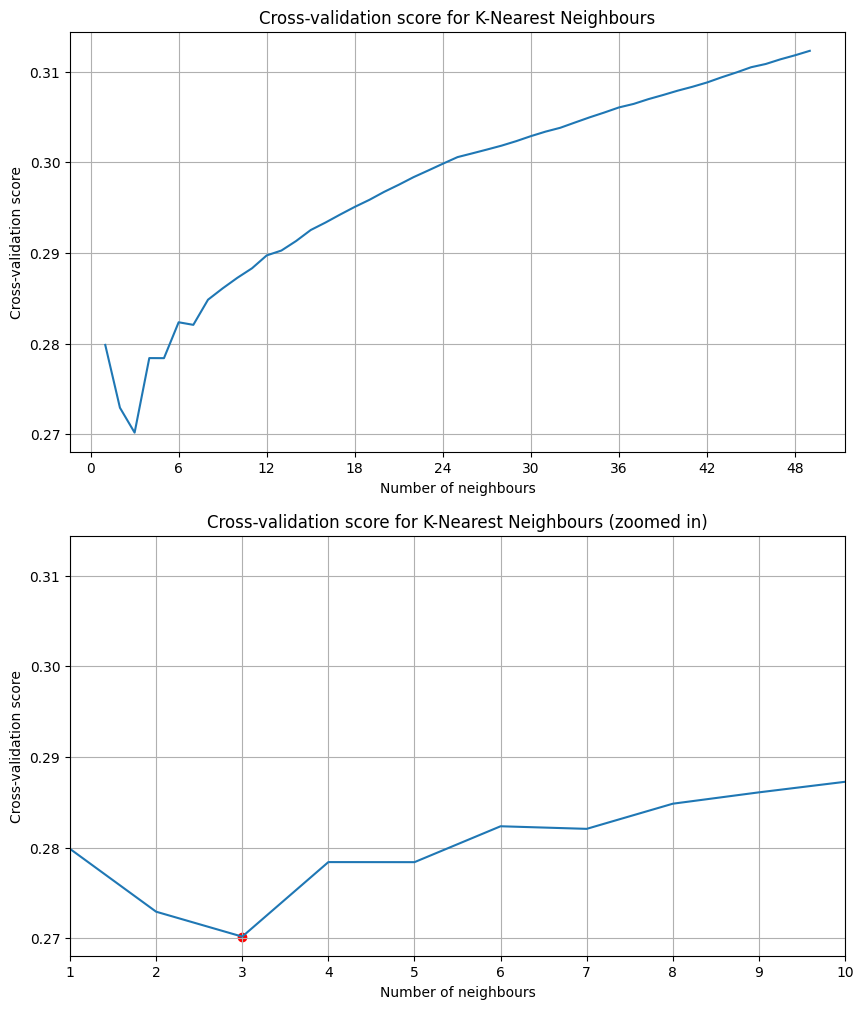

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

ax[0].plot(mse_values.keys(), mse_values.values())
ax[0].set_title("Cross-validation score for K-Nearest Neighbours")
ax[0].set_xlabel("Number of neighbours")
ax[0].set_ylabel("Cross-validation score")
ax[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax[0].grid(True)

ax[1].plot(mse_values.keys(), mse_values.values())
ax[1].scatter(3, mse_values[3], color='red')
ax[1].set_title("Cross-validation score for K-Nearest Neighbours (zoomed in)")
ax[1].set_xlabel("Number of neighbours")
ax[1].set_ylabel("Cross-validation score")
ax[1].set_xlim(1, 10)
ax[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax[1].grid(True)

plt.show()

In [19]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train_scaled)
    
measure_metrics(X_train_scaled, X_test_scaled, y_train, y_test, knn, scaler_y)

Best model on test data:
Normalized Root Mean Squared Error: 0.13041560437242974
R-squared: 0.6045657708544545
Mean Absolute Error: 10.596223359083739
Explained Variance Score: 0.6067650099738642
= = = = =
Best model on training data:
Root Mean Squared Error: 0.06374823810517834
R-squared: 0.923133818067254
Mean Absolute Error: 4.010160400225491
Explained Variance Score: 0.9232641512282462


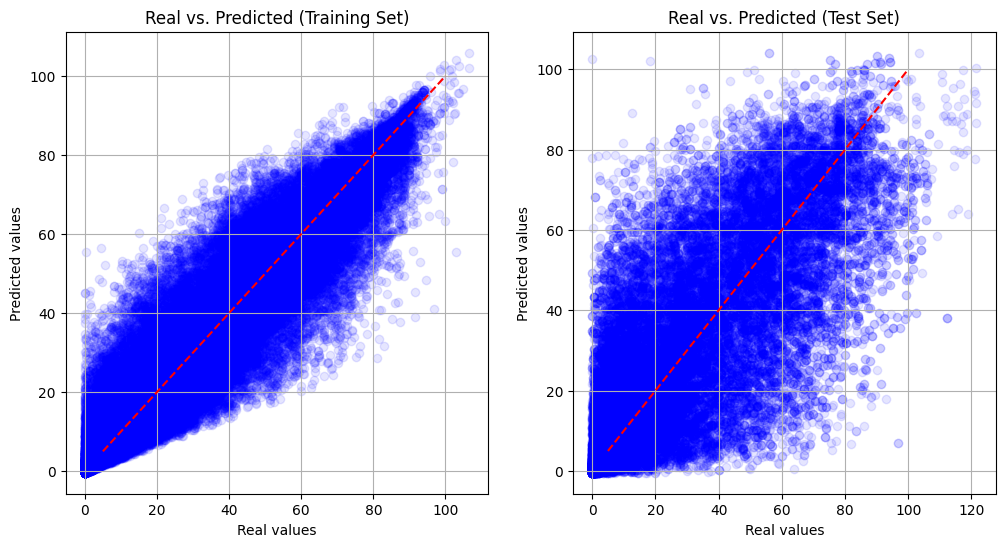

In [25]:
plot_pred_vs_real(X_train_scaled, X_test_scaled, y_train, y_test, knn, scaler_y)

# Decision Tree

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train_scaled)
    
measure_metrics(X_train_scaled, X_test_scaled, y_train, y_test, dtr, scaler_y)

Best model on test data:
Normalized Root Mean Squared Error: 0.1435790667865779
R-squared: 0.5207110732669109
Mean Absolute Error: 11.367156638731737
Explained Variance Score: 0.5228631930248681
= = = = =
Best model on training data:
Root Mean Squared Error: 0.008310175195643948
R-squared: 0.9986937710743766
Mean Absolute Error: 0.5802758002340489
Explained Variance Score: 0.9988184428138184


In [ ]:
from sklearn.experimental import enable_halving_search_cv

from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint

dtr.get_params()

param_grid = {
    'max_depth': [11, 12, 13, 14],
    'min_samples_split': randint(100, 500),
    'min_samples_leaf': randint(50, 200),
    'criterion': ['absolute_error']
}
grid_search = HalvingRandomSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2', verbose=10)

grid_search.fit(X_train_scaled, y_train_scaled)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

In [107]:
dtr = DecisionTreeRegressor(max_depth=12, min_samples_leaf=204, min_samples_split=64, criterion='absolute_error')
dtr.fit(X_train_scaled, y_train_scaled)

measure_metrics(X_train_scaled, X_test_scaled, y_train, y_test, dtr, scaler_y)

Best model on test data:
Normalized Root Mean Squared Error: 0.12365111059052407
R-squared: 0.6445232624753074
Mean Absolute Error: 9.893218383022772
Explained Variance Score: 0.6457304960307955
= = = = =
Best model on training data:
Root Mean Squared Error: 0.11792106341480062
R-squared: 0.736984276961213
Mean Absolute Error: 7.992565252661207
Explained Variance Score: 0.7376848079612452


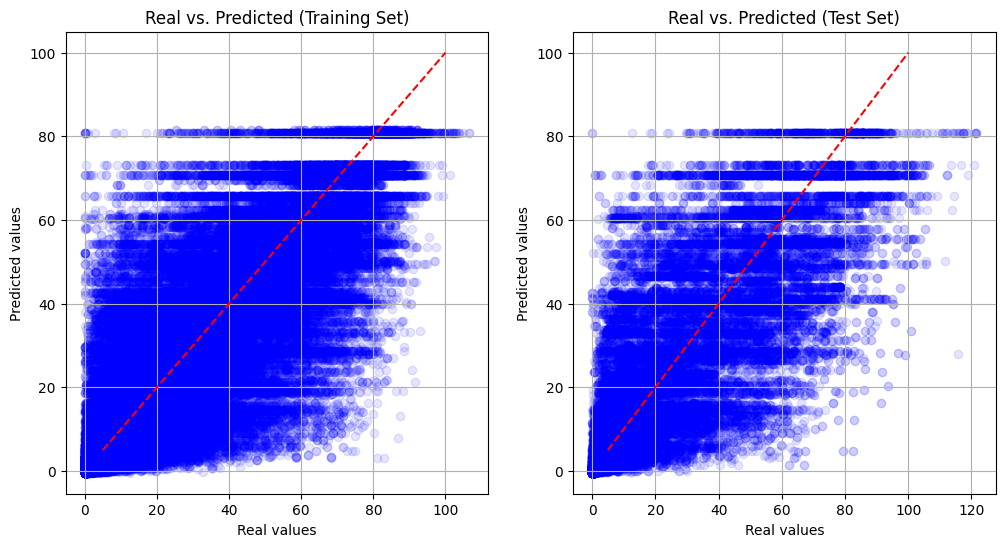

In [108]:
plot_pred_vs_real(X_train_scaled, X_test_scaled, y_train, y_test, dtr, scaler_y)

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
from numpy import ravel

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint

param_grid = {
    'n_estimators': randint(50, 300),
    'criterion': ['absolute_error']
}
grid_search = HalvingRandomSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', verbose=10)

grid_search.fit(X_train_scaled, ravel(y_train_scaled))

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

In [32]:
rfr = RandomForestRegressor(n_estimators=286)
rfr.fit(X_train_scaled, ravel(y_train_scaled))

measure_metrics(X_train_scaled, X_test_scaled, y_train, y_test, rfr, scaler_y)

Best model on test data:
Normalized Root Mean Squared Error: 0.11125489186396562
R-squared: 0.7122247931362617
Mean Absolute Error: 9.107917553335005
Explained Variance Score: 0.7138582079552362
= = = = =
Best model on training data:
Root Mean Squared Error: 0.0254363909221323
R-squared: 0.9877620149298774
Mean Absolute Error: 1.5647995270709505
Explained Variance Score: 0.987915551372639


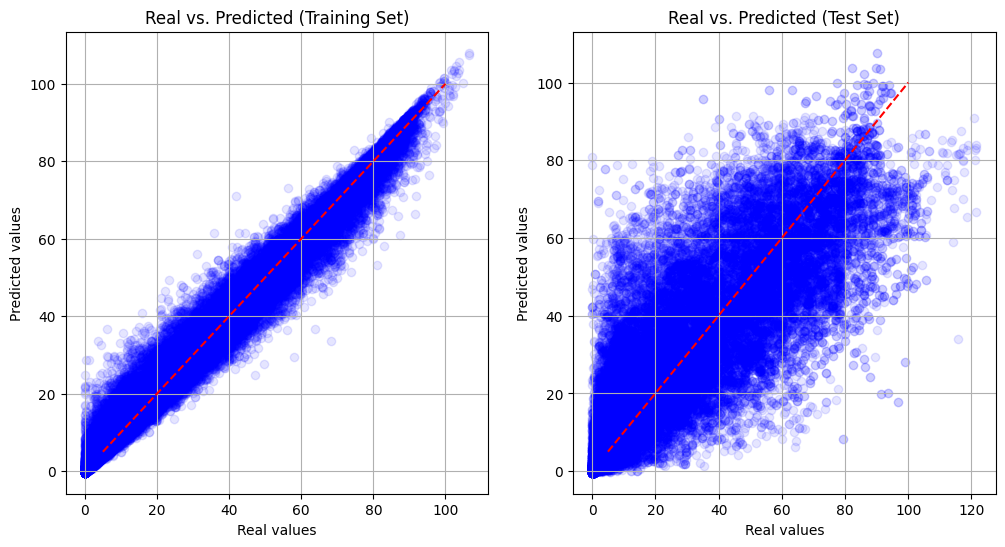

In [33]:
plot_pred_vs_real(X_train_scaled, X_test_scaled, y_train, y_test, rfr, scaler_y)

In [34]:
rfr = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth=12, min_samples_leaf=50, min_samples_split=144)
rfr.fit(X_train_scaled, ravel(y_train_scaled))

measure_metrics(X_train_scaled, X_test_scaled, y_train, y_test, rfr, scaler_y)

Best model on test data:
Normalized Root Mean Squared Error: 0.11898527732234121
R-squared: 0.6708441355154955
Mean Absolute Error: 9.551484097048391
Explained Variance Score: 0.6715725312821283
= = = = =
Best model on training data:
Root Mean Squared Error: 0.11066724645050834
R-squared: 0.7683474176839571
Mean Absolute Error: 7.398597198952791
Explained Variance Score: 0.7687045683141184
